# Network Traffic Analysis Using CICIDS2017 Dataset

This project seeks to overcome these limitations by integrating advanced machine learning techniques into network traffic analysis. It focuses on developing and deploying cutting-edge machine learning models, including anomaly detection algorithms and predictive analytics, to analyze and interpret extensive network traffic data. By leveraging these models, the project aims to significantly enhance threat detection accuracy, uncover subtle patterns that may indicate potential security breaches, and enable proactive responses to emerging threats. Additionally, the integration of explainable AI ensures that these complex models provide transparent and interpretable insights, allowing security professionals to understand, trust, and act on AI-driven findings. This comprehensive approach promises to significantly improve network security posture, offering deeper insights, more effective real-time anomaly detection, and enhanced defenses against evolving cyber threats. By addressing the inadequacies of traditional methods, this project aims to safeguard digital assets and maintain the integrity of network operations more effectively.

## Libraries

In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import lime
import lime.lime_tabular
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

## Import Dataset

In [87]:


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/Wednesday-workingHours.pcap_ISCX.csv


In [88]:
Monday=pd.read_csv('/kaggle/input/Monday-WorkingHours.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Tuesday=pd.read_csv('/kaggle/input/Tuesday-WorkingHours.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Wednesday=pd.read_csv('/kaggle/input/Wednesday-workingHours.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Thursday_Morning=pd.read_csv('/kaggle/input/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='latin1',low_memory=False)
Thursday_Afternoon=pd.read_csv('/kaggle/input/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Friday_Morning=pd.read_csv('/kaggle/input/Friday-WorkingHours-Morning.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Friday_Afternoon1=pd.read_csv('/kaggle/input/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',encoding='latin1',low_memory=False)
Friday_Afternoon2=pd.read_csv('/kaggle/input/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',encoding='latin1',low_memory=False)

In [89]:
dim_Monday = Monday.shape
dim_Tuesday = Tuesday.shape
dim_Wednesday = Wednesday.shape
dim_Thursday_Morning = Thursday_Morning.shape
dim_Thursday_Afternoon = Thursday_Afternoon.shape
dim_Friday_Morning = Friday_Morning.shape
dim_Friday_Afternoon1 = Friday_Afternoon1.shape
dim_Friday_Afternoon2 = Friday_Afternoon1.shape

print(f"Dimensions of Monday dataset: {dim_Monday[0]} rows, {dim_Monday[1]} columns")
print(f"Dimensions of Tuesday dataset: {dim_Tuesday[0]} rows, {dim_Tuesday[1]} columns")
print(f"Dimensions of Wednesday dataset: {dim_Wednesday[0]} rows, {dim_Wednesday[1]} columns")
print(f"Dimensions of Thursday Morning dataset: {dim_Thursday_Morning[0]} rows, {dim_Thursday_Morning[1]} columns")
print(f"Dimensions of Thursday Afternoon dataset: {dim_Thursday_Afternoon[0]} rows, {dim_Thursday_Afternoon[1]} columns")
print(f"Dimensions of Friday Morning dataset: {dim_Friday_Morning[0]} rows, {dim_Friday_Morning[1]} columns")
print(f"Dimensions of Friday_Afternoon1 dataset: {dim_Friday_Afternoon1[0]} rows, {dim_Friday_Afternoon1[1]} columns")
print(f"Dimensions of Friday_Afternoon2 dataset: {dim_Friday_Afternoon2[0]} rows, {dim_Friday_Afternoon2[1]} columns")

Dimensions of Monday dataset: 529918 rows, 85 columns
Dimensions of Tuesday dataset: 445909 rows, 85 columns
Dimensions of Wednesday dataset: 692703 rows, 85 columns
Dimensions of Thursday Morning dataset: 458968 rows, 85 columns
Dimensions of Thursday Afternoon dataset: 288602 rows, 85 columns
Dimensions of Friday Morning dataset: 191033 rows, 85 columns
Dimensions of Friday_Afternoon1 dataset: 225745 rows, 85 columns
Dimensions of Friday_Afternoon2 dataset: 225745 rows, 85 columns


In [90]:
data = {
    "Dataset": ["Monday", "Tuesday", "Wednesday", "Thursday Morning", "Thursday Afternoon",
                "Friday Morning", "Friday Afternoon 1", "Friday Afternoon 2"],
    "Rows": [dim_Monday[0], dim_Tuesday[0], dim_Wednesday[0], dim_Thursday_Morning[0],
             dim_Thursday_Afternoon[0], dim_Friday_Morning[0], dim_Friday_Afternoon1[0],
             dim_Friday_Afternoon2[0]],
    "Columns": [dim_Monday[1], dim_Tuesday[1], dim_Wednesday[1], dim_Thursday_Morning[1],
                dim_Thursday_Afternoon[1], dim_Friday_Morning[1], dim_Friday_Afternoon1[1],
                dim_Friday_Afternoon2[1]]
}
df = pd.DataFrame(data)
df

Dataset    Rows  Columns
0              Monday  529918       85
1             Tuesday  445909       85
2           Wednesday  692703       85
3    Thursday Morning  458968       85
4  Thursday Afternoon  288602       85
5      Friday Morning  191033       85
6  Friday Afternoon 1  225745       85
7  Friday Afternoon 2  225745       85

In [ ]:
Monday

In [92]:
data1 = pd.concat([Monday, Tuesday, Wednesday, Thursday_Morning, Thursday_Afternoon, Friday_Morning, Friday_Afternoon1, Friday_Afternoon2])
data1.head(5)

Flow ID      Source IP   Source Port  \
0   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
1   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
2   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
3   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
4  192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121          80.0   

   Destination IP   Destination Port   Protocol            Timestamp  \
0    192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
1    192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
2    192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
3    192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
4   192.168.10.14            49486.0        6.0  03/07/2017 08:56:22   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0             4.0                 2.0                      0.0  ...   
1             1.0                 2.0                      0.0  ...   
2             1.0                 2.0                      0.0  ...   
3             1.0                 2.0                      0.0  ...   
4             3.0                 2.0                      0.0  ...   

    min_seg_size_forward  Active Mean   Active Std   Active Max   Active Min  \
0                   20.0          0.0          0.0          0.0          0.0   
1                   20.0          0.0          0.0          0.0          0.0   
2                   20.0          0.0          0.0          0.0          0.0   
3                   20.0          0.0          0.0          0.0          0.0   
4                   20.0          0.0          0.0          0.0          0.0   

   Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0        0.0        0.0        0.0        0.0  BENIGN  
1        0.0        0.0        0.0        0.0  BENIGN  
2        0.0        0.0        0.0        0.0  BENIGN  
3        0.0        0.0        0.0        0.0  BENIGN  
4        0.0        0.0        0.0        0.0  BENIGN  

[5 rows x 85 columns]

## Pre-processing

In [93]:
data1.drop_duplicates(inplace=True)
data1

Flow ID      Source IP   Source Port  \
0         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
1         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
4        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121          80.0   
5        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121          80.0   
8           192.168.10.3-192.168.10.9-88-1031-6   192.168.10.9        1031.0   
...                                         ...            ...           ...   
286462  192.168.10.16-199.244.48.55-41926-443-6  192.168.10.16       41926.0   
286463  192.168.10.16-199.244.48.55-41934-443-6  192.168.10.16       41934.0   
286464  192.168.10.16-199.244.48.55-41932-443-6  192.168.10.16       41932.0   
286465  192.168.10.16-199.244.48.55-41930-443-6  192.168.10.16       41930.0   
286466  192.168.10.16-199.244.48.55-41928-443-6  192.168.10.16       41928.0   

        Destination IP   Destination Port   Protocol            Timestamp  \
0         192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
1         192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
4        192.168.10.14            49486.0        6.0  03/07/2017 08:56:22   
5        192.168.10.14            49486.0        6.0  03/07/2017 08:56:22   
8         192.168.10.3               88.0        6.0  03/07/2017 08:56:38   
...                ...                ...        ...                  ...   
286462   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286463   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286464   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286465   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286466   199.244.48.55              443.0        6.0        7/7/2017 3:29   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0                  4.0                 2.0                      0.0  ...   
1                  1.0                 2.0                      0.0  ...   
4                  3.0                 2.0                      0.0  ...   
5                  1.0                 2.0                      0.0  ...   
8                609.0                 7.0                      4.0  ...   
...                ...                 ...                      ...  ...   
286462        196135.0                49.0                     57.0  ...   
286463        378424.0                49.0                     59.0  ...   
286464        161800.0                70.0                    103.0  ...   
286465        142864.0                50.0                     62.0  ...   
286466        186928.0                46.0                     57.0  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                        20.0          0.0          0.0          0.0   
1                        20.0          0.0          0.0          0.0   
4                        20.0          0.0          0.0          0.0   
5                        20.0          0.0          0.0          0.0   
8                        20.0          0.0          0.0          0.0   
...                       ...          ...          ...          ...   
286462                   20.0          0.0          0.0          0.0   
286463                   20.0          0.0          0.0          0.0   
286464                   20.0          0.0          0.0          0.0   
286465                   20.0          0.0          0.0          0.0   
286466                   20.0          0.0          0.0          0.0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0               0.0        0.0        0.0        0.0        0.0  BENIGN  
1               0.0        0.0        0.0        0.0        0.0  BENIGN  
4               0.0        0.0        0.0        0.0        0.0  BENIGN  
5               0.0        0.0        0.0        0.0        0.0  BENIGN  
8     

In [94]:
trained_attack1 = data1[' Label'].map(lambda a: 1 if a in ['BENIGN'] else 0)
data1.loc[:, 'State'] = trained_attack1

In [95]:
data1

Flow ID      Source IP   Source Port  \
0         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
1         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126          80.0   
4        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121          80.0   
5        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121          80.0   
8           192.168.10.3-192.168.10.9-88-1031-6   192.168.10.9        1031.0   
...                                         ...            ...           ...   
286462  192.168.10.16-199.244.48.55-41926-443-6  192.168.10.16       41926.0   
286463  192.168.10.16-199.244.48.55-41934-443-6  192.168.10.16       41934.0   
286464  192.168.10.16-199.244.48.55-41932-443-6  192.168.10.16       41932.0   
286465  192.168.10.16-199.244.48.55-41930-443-6  192.168.10.16       41930.0   
286466  192.168.10.16-199.244.48.55-41928-443-6  192.168.10.16       41928.0   

        Destination IP   Destination Port   Protocol            Timestamp  \
0         192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
1         192.168.10.5            49188.0        6.0  03/07/2017 08:55:58   
4        192.168.10.14            49486.0        6.0  03/07/2017 08:56:22   
5        192.168.10.14            49486.0        6.0  03/07/2017 08:56:22   
8         192.168.10.3               88.0        6.0  03/07/2017 08:56:38   
...                ...                ...        ...                  ...   
286462   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286463   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286464   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286465   199.244.48.55              443.0        6.0        7/7/2017 3:29   
286466   199.244.48.55              443.0        6.0        7/7/2017 3:29   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0                  4.0                 2.0                      0.0  ...   
1                  1.0                 2.0                      0.0  ...   
4                  3.0                 2.0                      0.0  ...   
5                  1.0                 2.0                      0.0  ...   
8                609.0                 7.0                      4.0  ...   
...                ...                 ...                      ...  ...   
286462        196135.0                49.0                     57.0  ...   
286463        378424.0                49.0                     59.0  ...   
286464        161800.0                70.0                    103.0  ...   
286465        142864.0                50.0                     62.0  ...   
286466        186928.0                46.0                     57.0  ...   

        Active Mean   Active Std   Active Max   Active Min  Idle Mean  \
0               0.0          0.0          0.0          0.0        0.0   
1               0.0          0.0          0.0          0.0        0.0   
4               0.0          0.0          0.0          0.0        0.0   
5               0.0          0.0          0.0          0.0        0.0   
8               0.0          0.0          0.0          0.0        0.0   
...             ...          ...          ...          ...        ...   
286462          0.0          0.0          0.0          0.0        0.0   
286463          0.0          0.0          0.0          0.0        0.0   
286464          0.0          0.0          0.0          0.0        0.0   
286465          0.0          0.0          0.0          0.0        0.0   
286466          0.0          0.0          0.0          0.0        0.0   

         Idle Std   Idle Max   Idle Min   Label  State  
0             0.0        0.0        0.0  BENIGN      1  
1             0.0        0.0        0.0  BENIGN      1  
4             0.0        0.0        0.0  BENIGN      1  
5             0.0        0.0        0.0  BENIGN      1  
8             0.0        0.0        0.0  BENIGN      1  
...           ...     

In [96]:
data1.columns = data1.columns.str.strip()
print("Column names after stripping whitespace:")
print(data1.columns.tolist())

Column names after stripping whitespace:
['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 

In [97]:
unique_entries = {col: data1[col].nunique() for col in data1.columns}
for col, unique_vals in unique_entries.items():
    print(f"Unique values in {col}: {unique_vals}")

Unique values in Flow ID: 1085071
Unique values in Source IP: 17005
Unique values in Source Port: 64640
Unique values in Destination IP: 19112
Unique values in Destination Port: 53805
Unique values in Protocol: 3
Unique values in Timestamp: 27965
Unique values in Flow Duration: 1050899
Unique values in Total Fwd Packets: 1432
Unique values in Total Backward Packets: 1747
Unique values in Total Length of Fwd Packets: 17928
Unique values in Total Length of Bwd Packets: 64698
Unique values in Fwd Packet Length Max: 5279
Unique values in Fwd Packet Length Min: 384
Unique values in Fwd Packet Length Mean: 109091
Unique values in Fwd Packet Length Std: 254384
Unique values in Bwd Packet Length Max: 4838
Unique values in Bwd Packet Length Min: 583
Unique values in Bwd Packet Length Mean: 154284
Unique values in Bwd Packet Length Std: 249206
Unique values in Flow Bytes/s: 1595244
Unique values in Flow Packets/s: 1242273
Unique values in Flow IAT Mean: 1170377
Unique values in Flow IAT Std: 105

In [98]:
data1.isna().sum()

Flow ID             1
Source IP           1
Source Port         1
Destination IP      1
Destination Port    1
                   ..
Idle Std            1
Idle Max            1
Idle Min            1
Label               1
State               0
Length: 86, dtype: int64

In [99]:
data1.dropna(inplace=True)
data1

Flow ID      Source IP  Source Port  \
0         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
1         192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
4        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121         80.0   
5        192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121         80.0   
8           192.168.10.3-192.168.10.9-88-1031-6   192.168.10.9       1031.0   
...                                         ...            ...          ...   
286462  192.168.10.16-199.244.48.55-41926-443-6  192.168.10.16      41926.0   
286463  192.168.10.16-199.244.48.55-41934-443-6  192.168.10.16      41934.0   
286464  192.168.10.16-199.244.48.55-41932-443-6  192.168.10.16      41932.0   
286465  192.168.10.16-199.244.48.55-41930-443-6  192.168.10.16      41930.0   
286466  192.168.10.16-199.244.48.55-41928-443-6  192.168.10.16      41928.0   

       Destination IP  Destination Port  Protocol            Timestamp  \
0        192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
1        192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
4       192.168.10.14           49486.0       6.0  03/07/2017 08:56:22   
5       192.168.10.14           49486.0       6.0  03/07/2017 08:56:22   
8        192.168.10.3              88.0       6.0  03/07/2017 08:56:38   
...               ...               ...       ...                  ...   
286462  199.244.48.55             443.0       6.0        7/7/2017 3:29   
286463  199.244.48.55             443.0       6.0        7/7/2017 3:29   
286464  199.244.48.55             443.0       6.0        7/7/2017 3:29   
286465  199.244.48.55             443.0       6.0        7/7/2017 3:29   
286466  199.244.48.55             443.0       6.0        7/7/2017 3:29   

        Flow Duration  Total Fwd Packets  Total Backward Packets  ...  \
0                 4.0                2.0                     0.0  ...   
1                 1.0                2.0                     0.0  ...   
4                 3.0                2.0                     0.0  ...   
5                 1.0                2.0                     0.0  ...   
8               609.0                7.0                     4.0  ...   
...               ...                ...                     ...  ...   
286462       196135.0               49.0                    57.0  ...   
286463       378424.0               49.0                    59.0  ...   
286464       161800.0               70.0                   103.0  ...   
286465       142864.0               50.0                    62.0  ...   
286466       186928.0               46.0                    57.0  ...   

        Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
0               0.0         0.0         0.0         0.0        0.0       0.0   
1               0.0         0.0         0.0         0.0        0.0       0.0   
4               0.0         0.0         0.0         0.0        0.0       0.0   
5               0.0         0.0         0.0         0.0        0.0       0.0   
8               0.0         0.0         0.0         0.0        0.0       0.0   
...             ...         ...         ...         ...        ...       ...   
286462          0.0         0.0         0.0         0.0        0.0       0.0   
286463          0.0         0.0         0.0         0.0        0.0       0.0   
286464          0.0         0.0         0.0         0.0        0.0       0.0   
286465          0.0         0.0         0.0         0.0        0.0       0.0   
286466          0.0         0.0         0.0         0.0        0.0       0.0   

        Idle Max  Idle Min   Label  State  
0            0.0       0.0  BENIGN      1  
1            0.0       0.0  BENIGN      1  
4            0.0       0.0  BENIGN      1  
5            0.0       0.0  BENIGN      1  
8            0.0       0.0  BENIGN      1  
...          ...       ...     ...    ...  
286462       0.0       0.0  BENIGN      1  
286463      

In [100]:
total_missing = data1.isna().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

num_features_with_missing = (data1.isna().sum() > 0).sum()
print(f"Number of features with missing values: {num_features_with_missing}")

Total missing values in the dataset: 0
Number of features with missing values: 0


In [101]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data1.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")
encoder = LabelEncoder()
for col in categorical_columns:
    data1[col] = encoder.fit_transform(data1[col])

print("DataFrame after Label Encoding:")
data1

Categorical columns: Index(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label'], dtype='object')
DataFrame after Label Encoding:


Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0        942661      16439         80.0            5454           49188.0   
1        942661      16439         80.0            5454           49188.0   
4        442535      16434         80.0            5446           49486.0   
5        442535      16434         80.0            5446           49486.0   
8        891185       4724       1031.0            5453              88.0   
...         ...        ...          ...             ...               ...   
286462   486173       4715      41926.0            5993             443.0   
286463   486177       4715      41934.0            5993             443.0   
286464   486176       4715      41932.0            5993             443.0   
286465   486175       4715      41930.0            5993             443.0   
286466   486174       4715      41928.0            5993             443.0   

        Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0            6.0      12231            4.0                2.0   
1            6.0      12231            1.0                2.0   
4            6.0      12232            3.0                2.0   
5            6.0      12232            1.0                2.0   
8            6.0      12235          609.0                7.0   
...          ...        ...            ...                ...   
286462       6.0      27810       196135.0               49.0   
286463       6.0      27810       378424.0               49.0   
286464       6.0      27810       161800.0               70.0   
286465       6.0      27810       142864.0               50.0   
286466       6.0      27810       186928.0               46.0   

        Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
0                          0.0  ...          0.0         0.0         0.0   
1                          0.0  ...          0.0         0.0         0.0   
4                          0.0  ...          0.0         0.0         0.0   
5                          0.0  ...          0.0         0.0         0.0   
8                          4.0  ...          0.0         0.0         0.0   
...                        ...  ...          ...         ...         ...   
286462                    57.0  ...          0.0         0.0         0.0   
286463                    59.0  ...          0.0         0.0         0.0   
286464                   103.0  ...          0.0         0.0         0.0   
286465                    62.0  ...          0.0         0.0         0.0   
286466                    57.0  ...          0.0         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  State  
0              0.0        0.0       0.0       0.0       0.0      0      1  
1              0.0        0.0       0.0       0.0       0.0      0      1  
4              0.0        0.0       0.0       0.0       0.0      0      1  
5              0.0        0.0       0.0       0.0       0.0      0      1  
8              0.0        0.0       0.0       0.0       0.0      0      1  
...            ...        ...       ...       ...       ...    ...    ...  
286462         0.0        0.0       0.0       0.0       0.0      0      1  
286463         0.0        0.0       0.0       0.0       0.0      0      1  
286464         0.0        0.0       0.0       0.0       0.0      0      1  
286465         0.0        0.0       0.0       0.0       0.0      0      1  
286466         0.0        0.0       0.0       0.0       0.0      0      1  

[2829183 rows x 86 columns]

In [102]:
data1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [103]:
nan_counts = data1.isna().sum()
print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
State               0
Length: 86, dtype: int64


In [104]:
data1.dropna(inplace=True)
data1

Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0        942661      16439         80.0            5454           49188.0   
1        942661      16439         80.0            5454           49188.0   
4        442535      16434         80.0            5446           49486.0   
5        442535      16434         80.0            5446           49486.0   
8        891185       4724       1031.0            5453              88.0   
...         ...        ...          ...             ...               ...   
286462   486173       4715      41926.0            5993             443.0   
286463   486177       4715      41934.0            5993             443.0   
286464   486176       4715      41932.0            5993             443.0   
286465   486175       4715      41930.0            5993             443.0   
286466   486174       4715      41928.0            5993             443.0   

        Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0            6.0      12231            4.0                2.0   
1            6.0      12231            1.0                2.0   
4            6.0      12232            3.0                2.0   
5            6.0      12232            1.0                2.0   
8            6.0      12235          609.0                7.0   
...          ...        ...            ...                ...   
286462       6.0      27810       196135.0               49.0   
286463       6.0      27810       378424.0               49.0   
286464       6.0      27810       161800.0               70.0   
286465       6.0      27810       142864.0               50.0   
286466       6.0      27810       186928.0               46.0   

        Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
0                          0.0  ...          0.0         0.0         0.0   
1                          0.0  ...          0.0         0.0         0.0   
4                          0.0  ...          0.0         0.0         0.0   
5                          0.0  ...          0.0         0.0         0.0   
8                          4.0  ...          0.0         0.0         0.0   
...                        ...  ...          ...         ...         ...   
286462                    57.0  ...          0.0         0.0         0.0   
286463                    59.0  ...          0.0         0.0         0.0   
286464                   103.0  ...          0.0         0.0         0.0   
286465                    62.0  ...          0.0         0.0         0.0   
286466                    57.0  ...          0.0         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  State  
0              0.0        0.0       0.0       0.0       0.0      0      1  
1              0.0        0.0       0.0       0.0       0.0      0      1  
4              0.0        0.0       0.0       0.0       0.0      0      1  
5              0.0        0.0       0.0       0.0       0.0      0      1  
8              0.0        0.0       0.0       0.0       0.0      0      1  
...            ...        ...       ...       ...       ...    ...    ...  
286462         0.0        0.0       0.0       0.0       0.0      0      1  
286463         0.0        0.0       0.0       0.0       0.0      0      1  
286464         0.0        0.0       0.0       0.0       0.0      0      1  
286465         0.0        0.0       0.0       0.0       0.0      0      1  
286466         0.0        0.0       0.0       0.0       0.0      0      1  

[2827677 rows x 86 columns]

### Feature Selection

y=data1['State']
X=data1.drop('State', axis=1)

pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X, y)
classifier = pipeline.named_steps['classifier']


feature_importances = classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

low_importance_df = importance_df[importance_df['Importance'] < 0.001000]
print("Features with Importance Score < 0.001000:")
print(low_importance_df)

zero_importance_features = importance_df[importance_df['Importance'] == 0.0]['Feature'].tolist()
print(zero_importance_features)

In [105]:
columns_to_drop = [
               'Fwd Packet Length Min','Protocol','Active Mean','Down/Up Ratio','Fwd IAT Total','Bwd IAT Total','Flow Duration',
                'Active Min','FIN Flag Count','Flow IAT Min','Bwd IAT Max','Flow IAT Std','Bwd IAT Std','Fwd IAT Min',
                'Bwd Packet Length Min','Idle Std','Active Max','Active Std','Fwd PSH Flags','SYN Flag Count','CWE Flag Count',
                'Bwd Avg Bulk Rate','Bwd URG Flags','ECE Flag Count','Fwd URG Flags','RST Flag Count','Fwd Avg Bytes/Bulk',
                'Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd PSH Flags','Label'

]

X_cleaned = data1.drop(columns=columns_to_drop)
print("DataFrame after dropping columns:")
print(X_cleaned)

DataFrame after dropping columns:
        Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0        942661      16439         80.0            5454           49188.0   
1        942661      16439         80.0            5454           49188.0   
4        442535      16434         80.0            5446           49486.0   
5        442535      16434         80.0            5446           49486.0   
8        891185       4724       1031.0            5453              88.0   
...         ...        ...          ...             ...               ...   
286462   486173       4715      41926.0            5993             443.0   
286463   486177       4715      41934.0            5993             443.0   
286464   486176       4715      41932.0            5993             443.0   
286465   486175       4715      41930.0            5993             443.0   
286466   486174       4715      41928.0            5993             443.0   

        Timestamp  Total Fwd Packets  Tot

In [106]:
X_cleaned

Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0        942661      16439         80.0            5454           49188.0   
1        942661      16439         80.0            5454           49188.0   
4        442535      16434         80.0            5446           49486.0   
5        442535      16434         80.0            5446           49486.0   
8        891185       4724       1031.0            5453              88.0   
...         ...        ...          ...             ...               ...   
286462   486173       4715      41926.0            5993             443.0   
286463   486177       4715      41934.0            5993             443.0   
286464   486176       4715      41932.0            5993             443.0   
286465   486175       4715      41930.0            5993             443.0   
286466   486174       4715      41928.0            5993             443.0   

        Timestamp  Total Fwd Packets  Total Backward Packets  \
0           12231                2.0                     0.0   
1           12231                2.0                     0.0   
4           12232                2.0                     0.0   
5           12232                2.0                     0.0   
8           12235                7.0                     4.0   
...           ...                ...                     ...   
286462      27810               49.0                    57.0   
286463      27810               49.0                    59.0   
286464      27810               70.0                   103.0   
286465      27810               50.0                    62.0   
286466      27810               46.0                    57.0   

        Total Length of Fwd Packets  Total Length of Bwd Packets  ...  \
0                              12.0                          0.0  ...   
1                              12.0                          0.0  ...   
4                              12.0                          0.0  ...   
5                              12.0                          0.0  ...   
8                             484.0                        414.0  ...   
...                             ...                          ...  ...   
286462                       1331.0                     105841.0  ...   
286463                       1325.0                     104393.0  ...   
286464                       1427.0                     215903.0  ...   
286465                       1331.0                     110185.0  ...   
286466                       1319.0                     100049.0  ...   

        Subflow Bwd Packets  Subflow Bwd Bytes  Init_Win_bytes_forward  \
0                       0.0                0.0                   329.0   
1                       0.0                0.0                   329.0   
4                       0.0                0.0                   245.0   
5                       0.0                0.0                   245.0   
8                       4.0              414.0                  8192.0   
...                     ...                ...                     ...   
286462                 57.0           105841.0                 29200.0   
286463                 59.0           104393.0                 29200.0   
286464                103.0           215903.0                 29200.0   
286465                 62.0           110185.0                 29200.0   
286466                 57.0           100049.0                 29200.0   

        Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
0                          -1.0               1.0                  20.0   
1                          -1.0               1.0                  20.0   
4                          -1.0               1.0                  20.0   
5                          -1.0               1.0                  20.0   
8                        2053.0               5.0                  20.0   
...                         ...               ...                   ...   
286462                 

In [107]:
data1=X_cleaned

In [108]:
data1['State'].value_counts()

State
1    2271122
0     556555
Name: count, dtype: int64

# Exploratory Data Analysis

In [109]:
data1['State'].value_counts()

State
1    2271122
0     556555
Name: count, dtype: int64

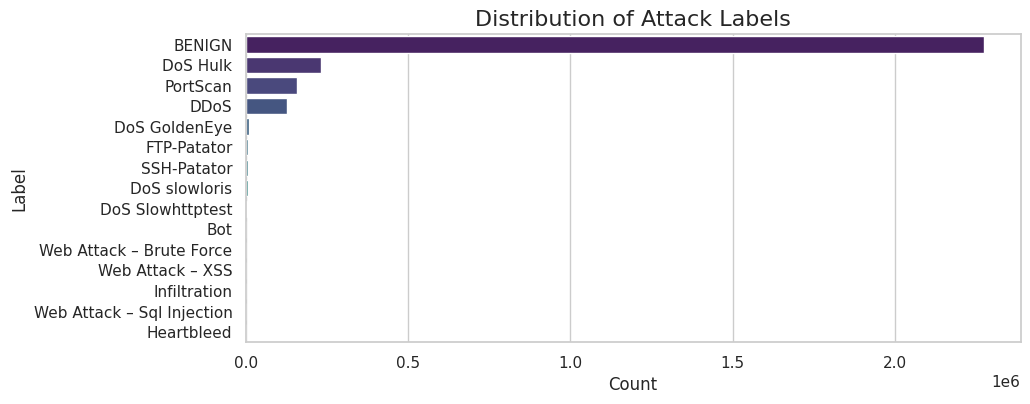

In [110]:
data = {
    'Label': ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator',
              'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack – Brute Force',
              'Web Attack – XSS', 'Infiltration', 'Web Attack – Sql Injection', 'Heartbleed'],
    'Count': [2273097, 231073, 158930, 128027, 10293, 7938, 5897, 5796, 5499, 1966,
              1507, 652, 36, 21, 11]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 4))
sns.barplot(x='Count', y='Label', data=df, palette='viridis')
plt.title('Distribution of Attack Labels', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

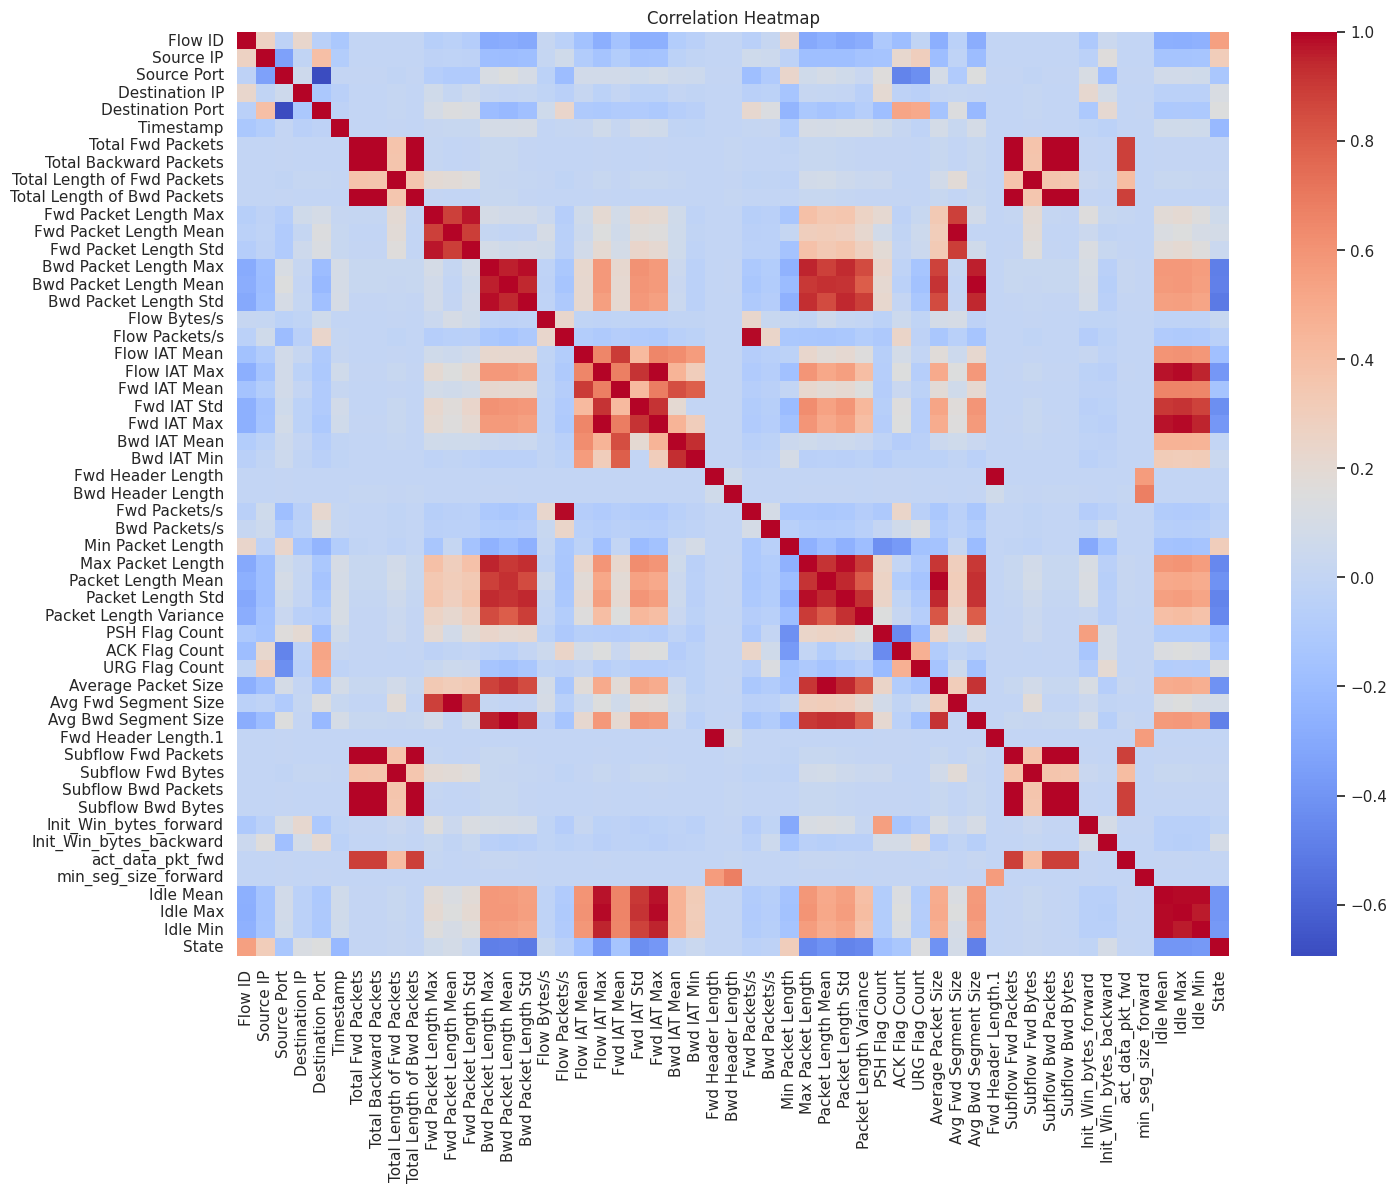

In [111]:
corr_matrix = data1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### Splitting and Standardization

In [112]:
y=data1['State']
X =data1.drop('State', axis = 1)

In [113]:
stan_enc=StandardScaler()
X_normalized = pd.DataFrame(stan_enc.fit_transform(X), columns=X.columns)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1979373, 52) (848304, 52) (1979373,) (848304,)


In [115]:
print("Before SMOTE:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Before SMOTE:
X_train shape: (1979373, 52)
y_train shape: (1979373,)


In [116]:
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [117]:
print("\nAfter SMOTE:")
print(f"X_train_SMOTE shape: {X_train_SMOTE.shape}")
print(f"y_train_SMOTE shape: {y_train_SMOTE.shape}")


After SMOTE:
X_train_SMOTE shape: (3180060, 52)
y_train_SMOTE shape: (3180060,)


# Random Forest

In [118]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_rf=rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf )
print("Random Forest Model Test Accuracy:", accuracy_rf)

Random Forest Model Test Accuracy: 0.9999693506101586


In [119]:
y_pred_rf1=rf.predict(X_train)
accuracy_rf1 = accuracy_score(y_train, y_pred_rf1)
print("Random Forest Model Train Accuracy:", accuracy_rf1)

Random Forest Model Train Accuracy: 1.0


In [120]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Accuracy: 1.00

Confusion Matrix:
[[167198     14]
 [    12 681080]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167212
           1       1.00      1.00      1.00    681092

    accuracy                           1.00    848304
   macro avg       1.00      1.00      1.00    848304
weighted avg       1.00      1.00      1.00    848304



In [121]:
y_pred_rf1 = rf.predict(X_train)
accuracy_rf1 = accuracy_score(y_train, y_pred_rf1)
print("Decision Tree Model Train Accuracy:", accuracy_rf1)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf1))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_rf1))

Decision Tree Model Train Accuracy: 1.0

Train Confusion Matrix:
[[ 389343       0]
 [      0 1590030]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    389343
           1       1.00      1.00      1.00   1590030

    accuracy                           1.00   1979373
   macro avg       1.00      1.00      1.00   1979373
weighted avg       1.00      1.00      1.00   1979373



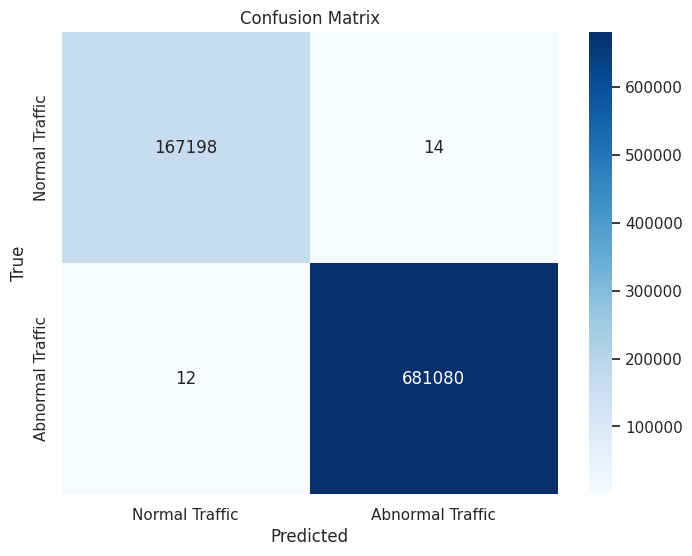

In [122]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Normal Traffic', 'Abnormal Traffic'], yticklabels=['Normal Traffic', 'Abnormal Traffic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

In [123]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                        Feature  Importance
1                     Source IP    0.271914
0                       Flow ID    0.194108
3                Destination IP    0.120195
45       Init_Win_bytes_forward    0.042038
37          Average Packet Size    0.029162
29            Min Packet Length    0.028809
14       Bwd Packet Length Mean    0.026314
2                   Source Port    0.024075
32            Packet Length Std    0.023230
39         Avg Bwd Segment Size    0.019539
15        Bwd Packet Length Std    0.019437
33       Packet Length Variance    0.019288
5                     Timestamp    0.014840
8   Total Length of Fwd Packets    0.014748
9   Total Length of Bwd Packets    0.014099
4              Destination Port    0.013532
10        Fwd Packet Length Max    0.013417
13        Bwd Packet Length Max    0.013355
46      Init_Win_bytes_backward    0.012473
31           Packet Length Mean    0.009778
38         Avg Fwd Segment Size    0.009584
30            Max Packet Length 

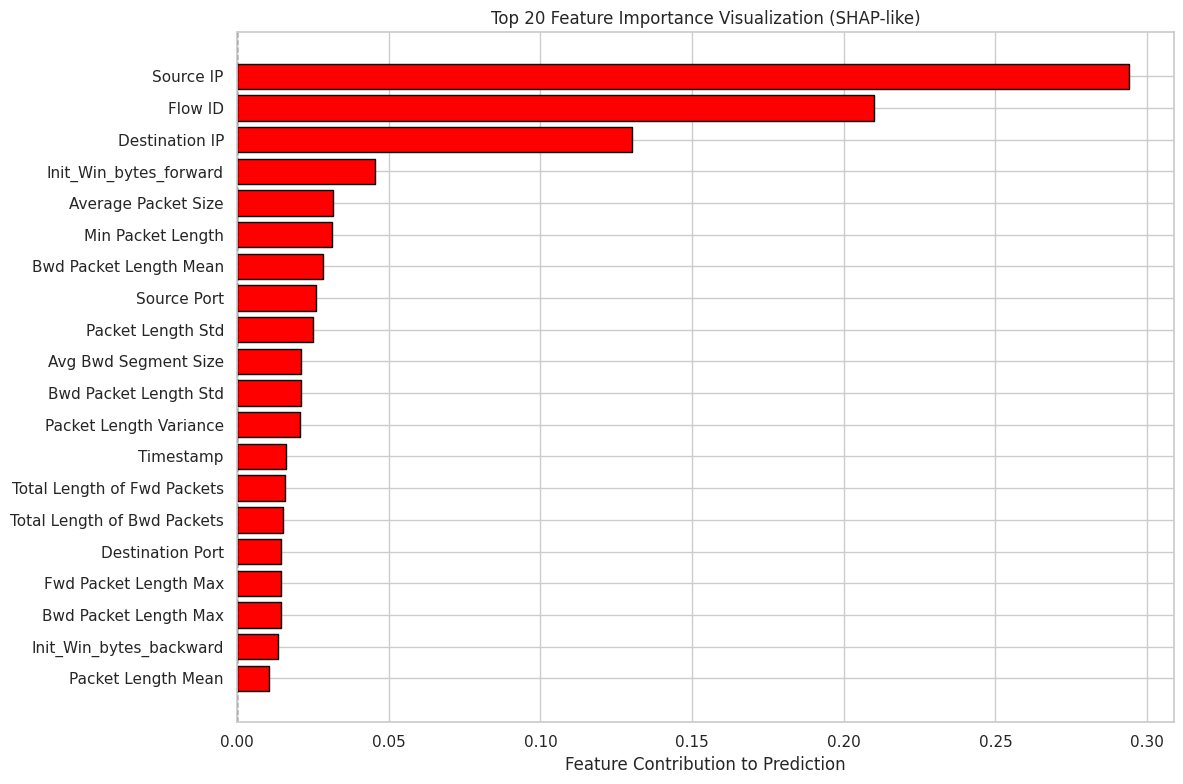

In [124]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

top20_features = feature_importances.head(20)
features = top20_features['Feature'].values
importances = top20_features['Importance'].values
importances = importances / np.sum(importances)

colors = ['red' if imp > 0 else 'blue' for imp in importances]
plt.figure(figsize=(12, 8))
plt.barh(features, importances, color=colors, edgecolor='black')

plt.axvline(0, color='black', linestyle='--', lw=1)
plt.xlabel('Feature Contribution to Prediction')
plt.title('Top 20 Feature Importance Visualization (SHAP-like)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)
shap_values_class = shap_values[1] if len(shap_values) > 1 else shap_values
plt.figure(figsize=(16, 4))
shap.summary_plot(shap_values_class, X_train, max_display=20, show=True, plot_type="bar")
plt.savefig('File1.png', bbox_inches='tight')
plt.close()

### LIME (Local Interpretable Model-agnostic Explanations) For Decision Tree

In [125]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Abnormal Traffic','Normal Traffic'],
                                                   discretize_continuous=True)

i = 0
instance = X_test.iloc[i].values.reshape(1, -1)
exp = explainer.explain_instance(instance.flatten(), rf.predict_proba)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [126]:
explainer = LimeTabularExplainer(X_train.values,
                                   feature_names=X_train.columns,
                                   class_names=['Abnormal Traffic', 'Normal Traffic'],
                                   discretize_continuous=True)

def visualize_lime_explanation(instance):
    exp = explainer.explain_instance(instance.flatten(), rf.predict_proba)
    exp.show_in_notebook(show_table=True)

print("Unique labels in y_test:", np.unique(y_test))
normal_indices = np.where(y_test == 1)[0] 
if normal_indices.size > 0:
    normal_case_index = normal_indices[0]
    normal_instance = X_test.iloc[normal_case_index].values.reshape(1, -1)
    print("LIME Explanation for Normal Case:")
    visualize_lime_explanation(normal_instance)
else:
    print("No instances of Normal Traffic found in y_test.")

abnormal_indices = np.where(y_test == 0)[0]
if abnormal_indices.size > 0:
    abnormal_case_index = abnormal_indices[0]
    abnormal_instance = X_test.iloc[abnormal_case_index].values.reshape(1, -1)
    print("LIME Explanation for Abnormal Case:")
    visualize_lime_explanation(abnormal_instance)
else:
    print("No instances of Abnormal Traffic found in y_test.")

Unique labels in y_test: [0 1]
LIME Explanation for Normal Case:


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


LIME Explanation for Abnormal Case:


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Unique labels in y_test: [0 1]
LIME Explanation for Normal Case:


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


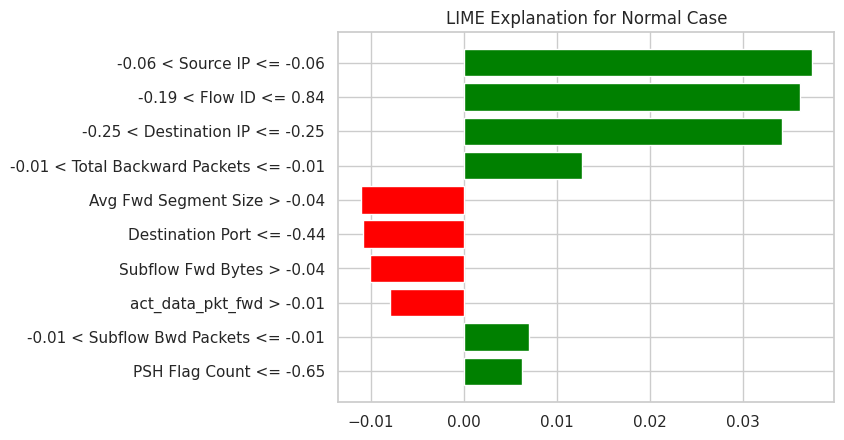

LIME Explanation for Abnormal Case:


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


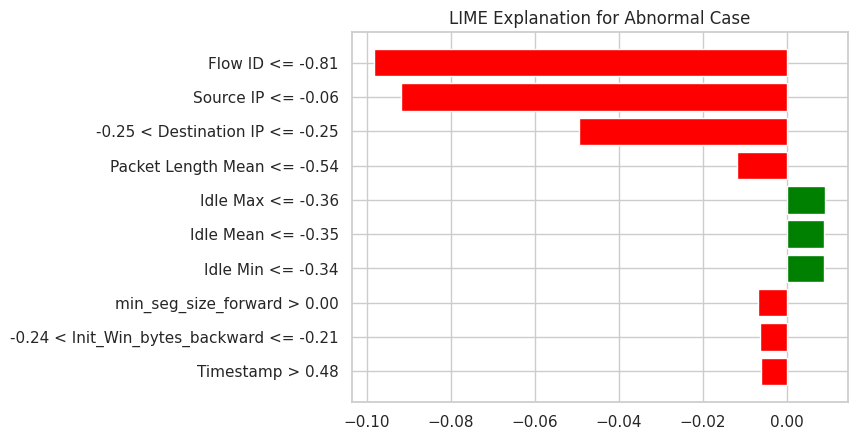

In [127]:
explainer = LimeTabularExplainer(X_train.values,
                                   feature_names=X_train.columns,
                                   class_names=['Abnormal Traffic', 'Normal Traffic'],
                                   discretize_continuous=True)

def visualize_lime_explanation(instance, title):
    exp = explainer.explain_instance(instance.flatten(), rf.predict_proba)

    fig = exp.as_pyplot_figure()
    plt.title(title)
    plt.show()

print("Unique labels in y_test:", np.unique(y_test))

normal_indices = np.where(y_test == 1)[0]
if normal_indices.size > 0:
    normal_case_index = normal_indices[0]
    normal_instance = X_test.iloc[normal_case_index].values.reshape(1, -1)
    print("LIME Explanation for Normal Case:")
    visualize_lime_explanation(normal_instance, "LIME Explanation for Normal Case")
else:
    print("No instances of Normal Traffic found in y_test.")

abnormal_indices = np.where(y_test == 0)[0]
if abnormal_indices.size > 0:
    abnormal_case_index = abnormal_indices[0]
    abnormal_instance = X_test.iloc[abnormal_case_index].values.reshape(1, -1)
    print("LIME Explanation for Abnormal Case:")
    visualize_lime_explanation(abnormal_instance, "LIME Explanation for Abnormal Case")
else:
    print("No instances of Abnormal Traffic found in y_test.")

### Counterfactual Explanations

In [128]:
def generate_counterfactual(instance, model, target_class, perturbation_strength=1.0):
    counterfactual = instance.copy()

    for i in range(len(counterfactual)):
        original_value = counterfactual.iloc[i]

        counterfactual.iloc[i] += perturbation_strength

        counterfactual_df = pd.DataFrame(counterfactual).T

        if model.predict(counterfactual_df)[0] == target_class:
            return counterfactual

        counterfactual.iloc[i] = original_value

    return None

instance = X.iloc[0]

counterfactual_instance = generate_counterfactual(instance, rf, target_class=1)

print("Original Instance:")
print(instance)
print("\nCounterfactual Instance:")
if counterfactual_instance is not None:
    print(counterfactual_instance)
else:
    print("No counterfactual found.")

Original Instance:
Flow ID                         942661.0
Source IP                        16439.0
Source Port                         80.0
Destination IP                    5454.0
Destination Port                 49188.0
Timestamp                        12231.0
Total Fwd Packets                    2.0
Total Backward Packets               0.0
Total Length of Fwd Packets         12.0
Total Length of Bwd Packets          0.0
Fwd Packet Length Max                6.0
Fwd Packet Length Mean               6.0
Fwd Packet Length Std                0.0
Bwd Packet Length Max                0.0
Bwd Packet Length Mean               0.0
Bwd Packet Length Std                0.0
Flow Bytes/s                   3000000.0
Flow Packets/s                  500000.0
Flow IAT Mean                        4.0
Flow IAT Max                         4.0
Fwd IAT Mean                         4.0
Fwd IAT Std                          0.0
Fwd IAT Max                          4.0
Bwd IAT Mean                         0

In [129]:
def generate_counterfactual(instance, model, target_class, perturbation_strength=0.1):
    counterfactual = instance.copy()

    for i in range(len(instance)):
        original_value = counterfactual[i]

        counterfactual[i] += perturbation_strength

        counterfactual_df = pd.DataFrame(counterfactual.reshape(1, -1), columns=X.columns)

        if model.predict(counterfactual_df)[0] == target_class:
            return counterfactual

        counterfactual[i] = original_value

    return None

instance = X.iloc[0].values
counterfactual_instance = generate_counterfactual(instance, rf, target_class=1)

print("Original instance:", instance)
print("Counterfactual instance:", counterfactual_instance)

Original instance: [ 9.42661e+05  1.64390e+04  8.00000e+01  5.45400e+03  4.91880e+04
  1.22310e+04  2.00000e+00  0.00000e+00  1.20000e+01  0.00000e+00
  6.00000e+00  6.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  3.00000e+06  5.00000e+05  4.00000e+00  4.00000e+00
  4.00000e+00  0.00000e+00  4.00000e+00  0.00000e+00  0.00000e+00
  4.00000e+01  0.00000e+00  5.00000e+05  0.00000e+00  6.00000e+00
  6.00000e+00  6.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  1.00000e+00  1.00000e+00  9.00000e+00  6.00000e+00  0.00000e+00
  4.00000e+01  2.00000e+00  1.20000e+01  0.00000e+00  0.00000e+00
  3.29000e+02 -1.00000e+00  1.00000e+00  2.00000e+01  0.00000e+00
  0.00000e+00  0.00000e+00]
Counterfactual instance: [ 9.426611e+05  1.643900e+04  8.000000e+01  5.454000e+03  4.918800e+04
  1.223100e+04  2.000000e+00  0.000000e+00  1.200000e+01  0.000000e+00
  6.000000e+00  6.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  3.000000e+06  5.000000e+05  4.000000e+0

In [130]:
def generate_counterfactual(instance, model, target_class, perturbation_strength=0.1):
    counterfactual = instance.copy()

    for i in range(len(instance)):
        original_value = counterfactual[i]

        counterfactual[i] += perturbation_strength

        counterfactual_df = pd.DataFrame(counterfactual.reshape(1, -1), columns=X.columns)

        if model.predict(counterfactual_df)[0] == target_class:
            return counterfactual

        counterfactual[i] = original_value

    return None

instance = X.iloc[0].values

counterfactual_instance = generate_counterfactual(instance, rf, target_class=1)

print("Original instance:", instance)
print("Counterfactual instance:", counterfactual_instance)

Original instance: [ 9.42661e+05  1.64390e+04  8.00000e+01  5.45400e+03  4.91880e+04
  1.22310e+04  2.00000e+00  0.00000e+00  1.20000e+01  0.00000e+00
  6.00000e+00  6.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  3.00000e+06  5.00000e+05  4.00000e+00  4.00000e+00
  4.00000e+00  0.00000e+00  4.00000e+00  0.00000e+00  0.00000e+00
  4.00000e+01  0.00000e+00  5.00000e+05  0.00000e+00  6.00000e+00
  6.00000e+00  6.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  1.00000e+00  1.00000e+00  9.00000e+00  6.00000e+00  0.00000e+00
  4.00000e+01  2.00000e+00  1.20000e+01  0.00000e+00  0.00000e+00
  3.29000e+02 -1.00000e+00  1.00000e+00  2.00000e+01  0.00000e+00
  0.00000e+00  0.00000e+00]
Counterfactual instance: [ 9.426611e+05  1.643900e+04  8.000000e+01  5.454000e+03  4.918800e+04
  1.223100e+04  2.000000e+00  0.000000e+00  1.200000e+01  0.000000e+00
  6.000000e+00  6.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  3.000000e+06  5.000000e+05  4.000000e+0

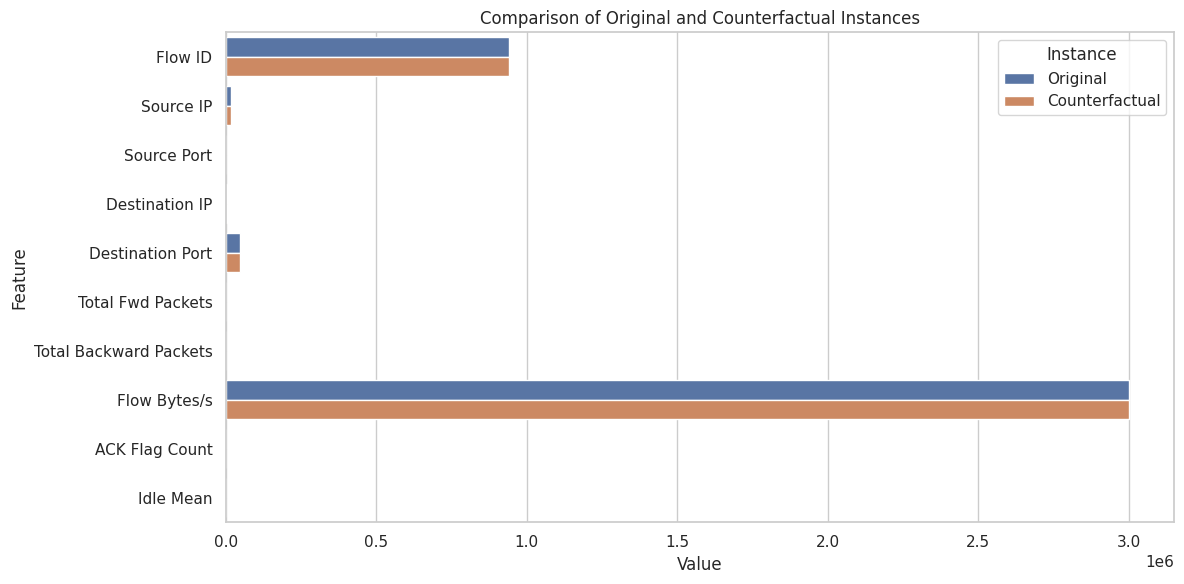

In [131]:
original_instance = {
    'Flow ID': 942661.0,
    'Source IP': 16439.0,
    'Source Port': 80.0,
    'Destination IP': 5454.0,
    'Destination Port': 49188.0,
    'Total Fwd Packets': 2.0,
    'Total Backward Packets': 0.0,
    'Flow Bytes/s': 3000000.0,
    'ACK Flag Count': 1.0,
    'Idle Mean': 0.0,
}

counterfactual_instance = {
    'Flow ID': 942662.0,
    'Source IP': 16439.0,
    'Source Port': 80.0,
    'Destination IP': 5454.0,
    'Destination Port': 49188.0,
    'Total Fwd Packets': 2.0,
    'Total Backward Packets': 0.0,
    'Flow Bytes/s': 3000000.0,
    'ACK Flag Count': 1.0,
    'Idle Mean': 0.0,
}

original_df = pd.DataFrame(original_instance, index=[0])
counterfactual_df = pd.DataFrame(counterfactual_instance, index=[0])
combined_df = pd.concat([original_df, counterfactual_df], keys=['Original', 'Counterfactual'])
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Instance'}, inplace=True)
melted_df = combined_df.melt(id_vars=['Instance'], var_name='Feature', value_name='Value')
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(y='Feature', x='Value', hue='Instance', data=melted_df)
plt.title('Comparison of Original and Counterfactual Instances')
plt.legend(title='Instance')
plt.tight_layout()
plt.show()

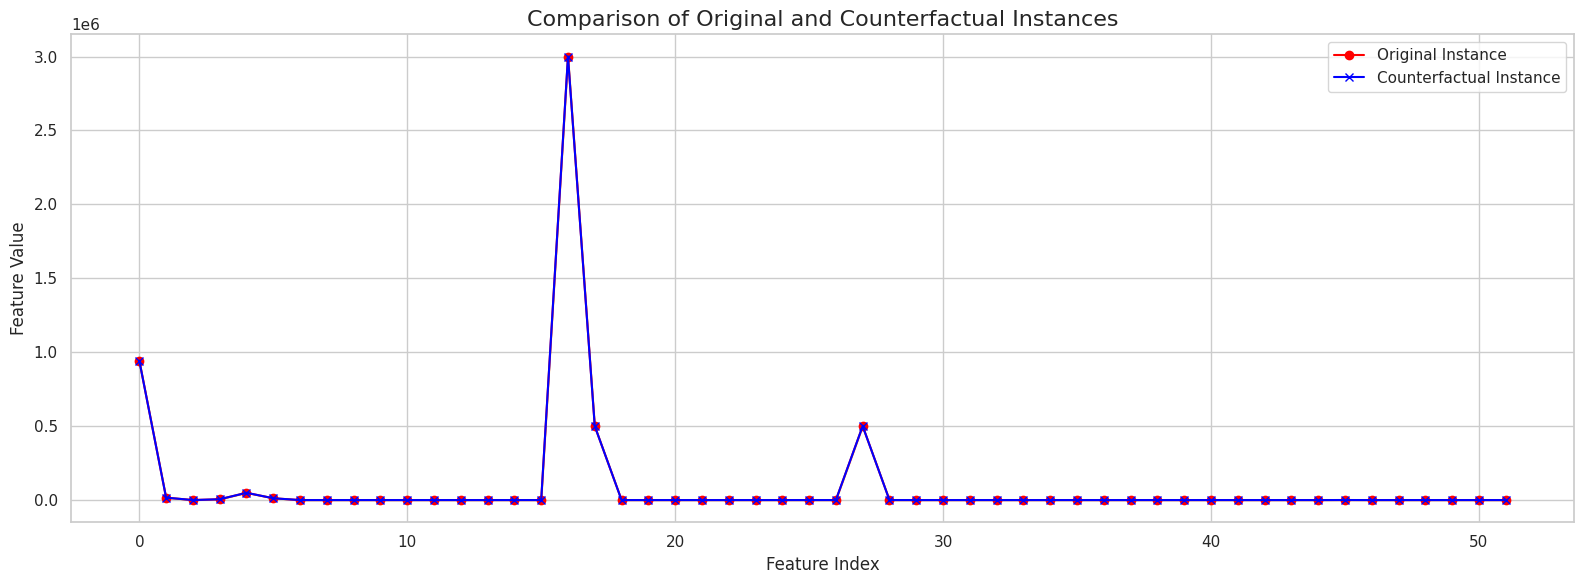

In [132]:
original_instance = np.array([9.42661e+05, 1.64390e+04, 8.00000e+01, 5.45400e+03, 4.91880e+04,
                              1.22310e+04, 2.00000e+00, 0.00000e+00, 1.20000e+01, 0.00000e+00,
                              6.00000e+00, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
                              0.00000e+00, 3.00000e+06, 5.00000e+05, 4.00000e+00, 4.00000e+00,
                              4.00000e+00, 0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00,
                              4.00000e+01, 0.00000e+00, 5.00000e+05, 0.00000e+00, 6.00000e+00,
                              6.00000e+00, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
                              1.00000e+00, 1.00000e+00, 9.00000e+00, 6.00000e+00, 0.00000e+00,
                              4.00000e+01, 2.00000e+00, 1.20000e+01, 0.00000e+00, 0.00000e+00,
                              3.29000e+02, -1.00000e+00, 1.00000e+00, 2.00000e+01, 0.00000e+00,
                              0.00000e+00, 0.00000e+00])

counterfactual_instance = np.array([9.426611e+05, 1.643900e+04, 8.000000e+01, 5.454000e+03, 4.918800e+04,
                                    1.223100e+04, 2.000000e+00, 0.000000e+00, 1.200000e+01, 0.000000e+00,
                                    6.000000e+00, 6.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
                                    0.000000e+00, 3.000000e+06, 5.000000e+05, 4.000000e+00, 4.000000e+00,
                                    4.000000e+00, 0.000000e+00, 4.000000e+00, 0.000000e+00, 0.000000e+00,
                                    4.000000e+01, 0.000000e+00, 5.000000e+05, 0.000000e+00, 6.000000e+00,
                                    6.000000e+00, 6.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
                                    1.000000e+00, 1.000000e+00, 9.000000e+00, 6.000000e+00, 0.000000e+00,
                                    4.000000e+01, 2.000000e+00, 1.200000e+01, 0.000000e+00, 0.000000e+00,
                                    3.290000e+02, -1.000000e+00, 1.000000e+00, 2.000000e+01, 0.000000e+00,
                                    0.000000e+00, 0.000000e+00])

plt.figure(figsize=(16, 6))
plt.plot(original_instance, label='Original Instance', marker='o', color='red')
plt.plot(counterfactual_instance, label='Counterfactual Instance', marker='x', color='blue')
plt.fill_between(range(len(original_instance)), original_instance, counterfactual_instance, color='orange', alpha=0.3)
plt.title('Comparison of Original and Counterfactual Instances', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Feature Value', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Partial Dependence

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


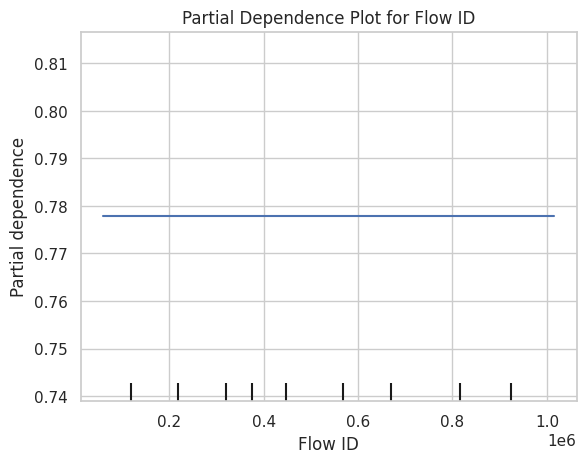

In [133]:
features = ['Flow ID']

PartialDependenceDisplay.from_estimator(
    rf,
    X,
    features,
    grid_resolution=20,
)
plt.title('Partial Dependence Plot for Flow ID')
plt.show()

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


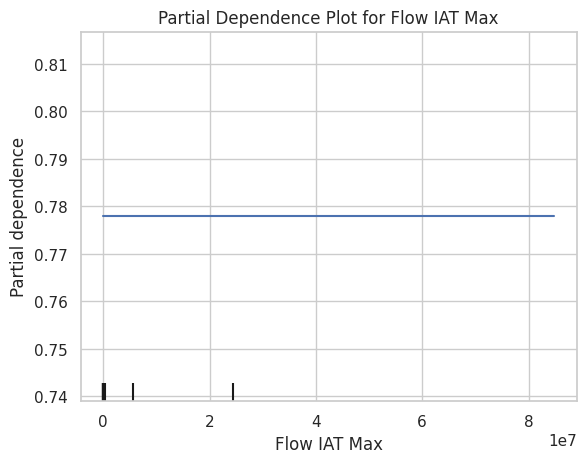

In [134]:
features = ['Flow IAT Max']

PartialDependenceDisplay.from_estimator(
    rf,
    X,
    features,
    grid_resolution=20,
)
plt.title('Partial Dependence Plot for Flow IAT Max')
plt.show()

### RuleFit

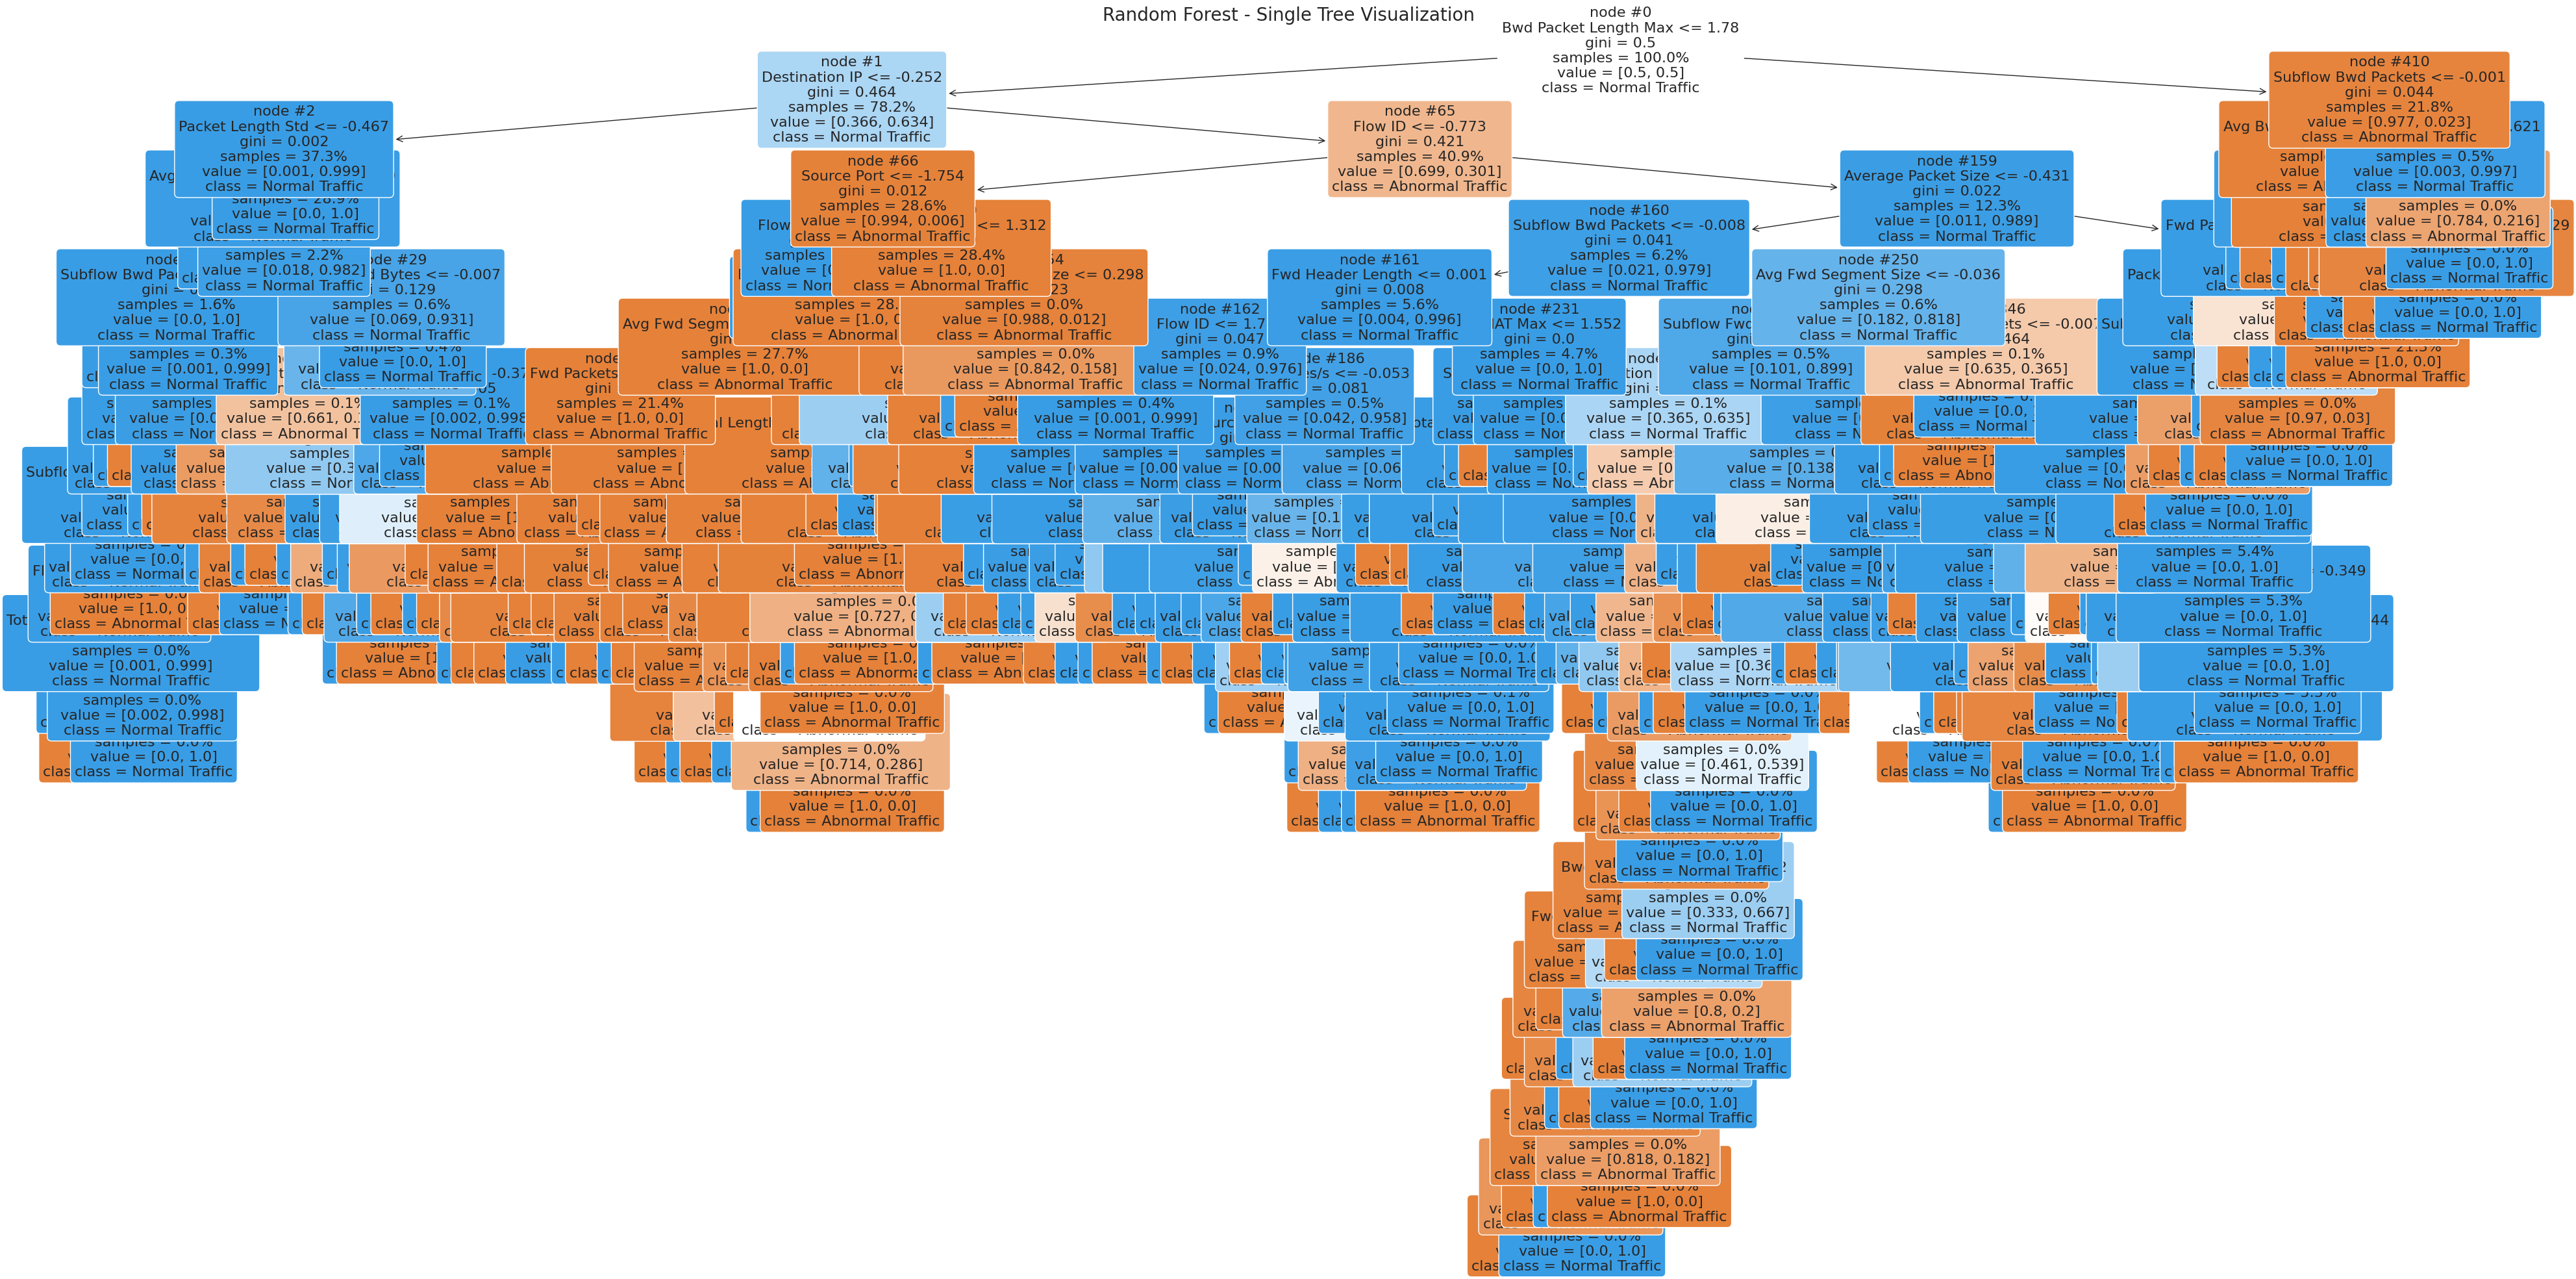

In [135]:
estimator = rf.estimators_[0]

plt.figure(figsize=(40, 20)) 
plot_tree(estimator, 
          feature_names=X_train.columns,  
          class_names=['Abnormal Traffic', 'Normal Traffic'],  
          filled=True, 
          rounded=True, 
          fontsize=16, 
          proportion=True,  
          node_ids=True) 

plt.title("Random Forest - Single Tree Visualization", fontsize=20)  
plt.tight_layout()  
plt.show()

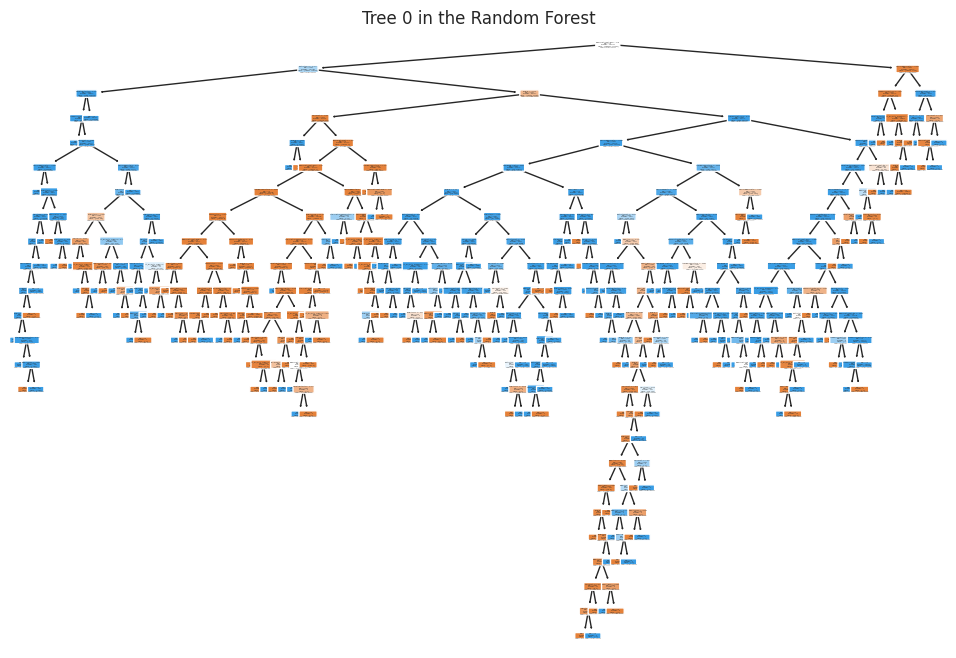

In [136]:
tree_index = 0
specific_tree = rf.estimators_[tree_index]
feature_names = X_train.columns
plt.figure(figsize=(12, 8))
plot_tree(specific_tree, feature_names=feature_names, class_names=['Abnormal Traffic', 'Normal Traffic'], filled=True, rounded=True)
plt.title(f"Tree {tree_index} in the Random Forest")
plt.show()

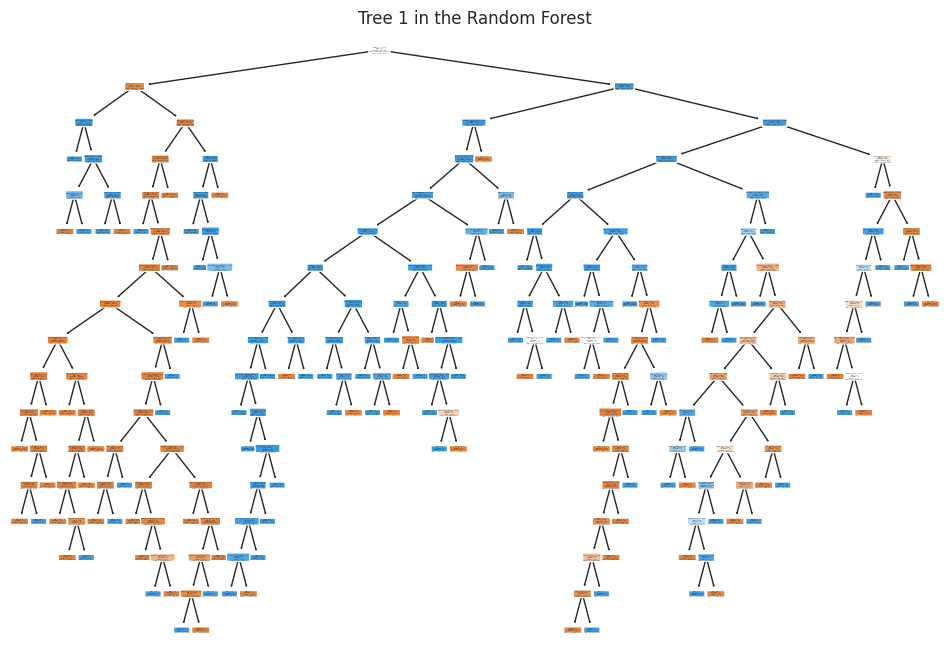

In [137]:
tree_index = 1
specific_tree = rf.estimators_[tree_index]
feature_names = X_train.columns
plt.figure(figsize=(12, 8))
plot_tree(specific_tree, feature_names=feature_names, class_names=['Abnormal Traffic', 'Normal Traffic'], filled=True, rounded=True)
plt.title(f"Tree {tree_index} in the Random Forest")
plt.show()

In [138]:
from sklearn.tree import plot_tree, export_text
feature_names = X_train.columns

# Export tree rules as text
tree_rules = export_text(specific_tree, feature_names=list(feature_names))
print(f"Rules for tree {tree_index}:\n")
print(tree_rules)

Rules for tree 1:

|--- Flow ID <= -0.77
|   |--- Destination IP <= -0.25
|   |   |--- Bwd Packets/s <= -0.03
|   |   |   |--- class: 1.0
|   |   |--- Bwd Packets/s >  -0.03
|   |   |   |--- Flow Packets/s <= -0.23
|   |   |   |   |--- Bwd Packets/s <= -0.03
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Bwd Packets/s >  -0.03
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Flow Packets/s >  -0.23
|   |   |   |   |--- Flow IAT Max <= -0.34
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Flow IAT Max >  -0.34
|   |   |   |   |   |--- class: 0.0
|   |--- Destination IP >  -0.25
|   |   |--- Destination IP <= -0.25
|   |   |   |--- Timestamp <= 0.51
|   |   |   |   |--- Source IP <= -0.71
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Source IP >  -0.71
|   |   |   |   |   |--- Packet Length Std <= 1.25
|   |   |   |   |   |   |--- Bwd Packet Length Max <= 1.39
|   |   |   |   |   |   |   |--- Max Packet Length <= -0.47
|   |   |   |   |   |   |   |   |--

In [139]:
instance = X_train.iloc[0:1]
tree_prediction = specific_tree.predict(instance)
forest_prediction = rf.predict(instance)

print(f"Prediction from Tree {tree_index}: {tree_prediction[0]}")
print(f"Prediction from Random Forest Model: {forest_prediction[0]}")

Prediction from Tree 1: 1.0
Prediction from Random Forest Model: 1


X has feature names, but DecisionTreeClassifier was fitted without feature names


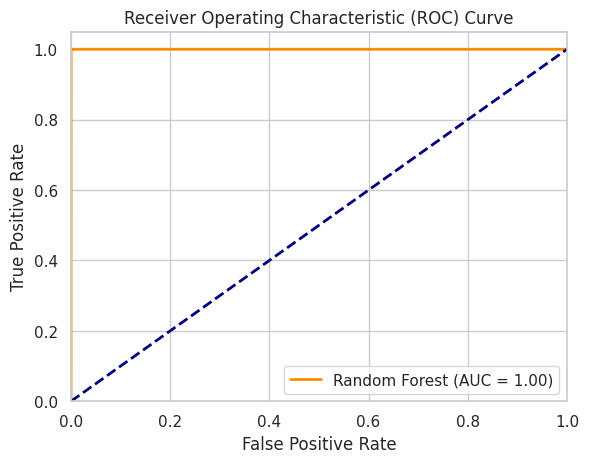

AUC for Random Forest model: 1.00


In [140]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Reshape X_test to a 2D array if necessary
X_test = X_test.values  # Convert to a NumPy array
X_test = X_test.reshape(-1, X_test.shape[-1])  # Reshape

# Convert X_test back to a DataFrame if necessary, using the correct feature names
X_test = pd.DataFrame(X_test, columns=rf.feature_names_in_)

# Get the predicted probabilities for the positive class
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)  # Calculate AUC

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for Random Forest model: {roc_auc:.2f}")


**LSTM**

In [141]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding


y = data1['State'].values
X = data1.drop('State', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2)

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust the output layer based on your use case

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=8, batch_size=64, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/8
  777/35346 ━━━━━━━━━━━━━━━━━━━━ 3:12 6ms/step - accuracy: 0.8602 - loss: 0.3984

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {accuracy:.4f}')

In [ ]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('Confusion_Matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Training Error (MSE): {train_error}")
print(f"Test Error (MSE): {test_error}")

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('RNN_Traffic.h5')

In [ ]:
import numpy as np
from lime import lime_tabular
from keras.models import load_model

# Load your model
loaded_model = load_model('RNN_Traffic.h5')

# Define feature names (make sure they match your data)
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']  # Update accordingly

# Reshape X_train if needed
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Check the dimensions
print("X_train shape:", X_train_reshaped.shape)
print("Feature names length:", len(feature_names))

# Ensure that X_train and feature_names match in terms of features
if X_train_reshaped.shape[1] != len(feature_names):
    raise ValueError("The number of features in X_train does not match the length of feature_names.")

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,  # Use the reshaped data
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Select an instance to explain
instance_to_explain = X_test[0].reshape(-1)  # Flatten if necessary

# Make a prediction
prediction = loaded_model.predict(np.expand_dims(instance_to_explain, axis=0))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from keras.models import load_model

# Load your model
loaded_model = load_model('RNN_Traffic.h5')

# Define feature names (make sure they match your data)
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']



X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Check the dimensions
print("X_train shape:", X_train_reshaped.shape)
print("Feature names length:", len(feature_names))

# Ensure that X_train and feature_names match in terms of features
if X_train_reshaped.shape[1] != len(feature_names):
    raise ValueError("The number of features in X_train does not match the length of feature_names.")

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Define a wrapper function to return probabilities for both classes
def predict_proba(X):
    # Predict probabilities using your Keras model
    probas = loaded_model.predict(X)
    
    # Convert to a 2D array with probabilities for both classes
    return np.hstack([1 - probas, probas])

# Select an instance to explain
instance_to_explain = X_test[0].reshape(-1)  # Flatten if necessary

# Explain the instance
explanation = explainer.explain_instance(
    instance_to_explain,
    predict_proba,  # Use the adjusted prediction function
    num_features=10  # Number of features to display
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# Alternatively, you can use matplotlib to display the explanation
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation for Instance")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from keras.models import load_model

# Load your trained model
loaded_model = load_model('RNN_Traffic.h5')

# Define feature names
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']

# Reshape X_train if needed
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Wrapper function to ensure output is a probability for both classes
def predict_proba(X):
    probas = loaded_model.predict(X)
    return np.hstack([1 - probas, probas])

# Find an "Abnormal" instance
abnormal_index = np.where(y_test == 0)[0][0]  # Assuming 0 is "Abnormal"
instance_abnormal = X_test[abnormal_index].reshape(-1)

# Explain the "Abnormal" instance
explanation_abnormal = explainer.explain_instance(
    instance_abnormal,
    predict_proba,
    num_features=10  # You can adjust this number
)

# Visualize the explanation for "Abnormal" instance
explanation_abnormal.show_in_notebook(show_table=True, show_all=False)
fig_abnormal = explanation_abnormal.as_pyplot_figure()
plt.title("LIME Explanation for Abnormal Instance")
plt.show()

# Find a "Normal" instance
normal_index = np.where(y_test == 1)[0][0]  # Assuming 1 is "Normal"
instance_normal = X_test[normal_index].reshape(-1)

# Explain the "Normal" instance
explanation_normal = explainer.explain_instance(
    instance_normal,
    predict_proba,
    num_features=10  # Adjust if necessary
)

# Visualize the explanation for "Normal" instance
explanation_normal.show_in_notebook(show_table=True, show_all=False)
fig_normal = explanation_normal.as_pyplot_figure()
plt.title("LIME Explanation for Normal Instance")
plt.show()


**CNN**

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dense, Input

y=data1['State'].values
X =data1.drop('State', axis = 1).values

#X = X.values 
#y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 128
input_length = 100

model = Sequential()
model.add(Input(shape=(input_length,)))  # Keep this if input_length is needed for the input layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))  # Removed input_length
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust the output layer based on your use case

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=8, batch_size=1000, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {accuracy:.4f}')

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('CNN_Traffic.h5')

In [ ]:
import numpy as np
from lime import lime_tabular
from keras.models import load_model

# Load your model
loaded_model = load_model('CNN_Traffic.h5')

# Define feature names (make sure they match your data)
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']  # Update accordingly

# Reshape X_train if needed
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Check the dimensions
print("X_train shape:", X_train_reshaped.shape)
print("Feature names length:", len(feature_names))

# Ensure that X_train and feature_names match in terms of features
if X_train_reshaped.shape[1] != len(feature_names):
    raise ValueError("The number of features in X_train does not match the length of feature_names.")

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,  # Use the reshaped data
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Select an instance to explain
instance_to_explain = X_test[0].reshape(-1)  # Flatten if necessary

# Make a prediction
prediction = loaded_model.predict(np.expand_dims(instance_to_explain, axis=0))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from keras.models import load_model

# Load your model
loaded_model = load_model('CNN_Traffic.h5')

# Define feature names (make sure they match your data)
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']



X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Check the dimensions
print("X_train shape:", X_train_reshaped.shape)
print("Feature names length:", len(feature_names))

# Ensure that X_train and feature_names match in terms of features
if X_train_reshaped.shape[1] != len(feature_names):
    raise ValueError("The number of features in X_train does not match the length of feature_names.")

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Define a wrapper function to return probabilities for both classes
def predict_proba(X):
    # Predict probabilities using your Keras model
    probas = loaded_model.predict(X)
    
    # Convert to a 2D array with probabilities for both classes
    return np.hstack([1 - probas, probas])

# Select an instance to explain
instance_to_explain = X_test[0].reshape(-1)  # Flatten if necessary

# Explain the instance
explanation = explainer.explain_instance(
    instance_to_explain,
    predict_proba,  # Use the adjusted prediction function
    num_features=10  # Number of features to display
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# Alternatively, you can use matplotlib to display the explanation
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation for Instance")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from keras.models import load_model

# Load your trained model
loaded_model = load_model('CNN_Traffic.h5')

# Define feature names
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Mean', 'Idle Max', 'Idle Min']

# Reshape X_train if needed
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Now it should be (2262141, 52)

# Set up the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_reshaped,
    feature_names=feature_names,
    class_names=['Abnormal', 'Normal'],
    mode='classification'
)

# Wrapper function to ensure output is a probability for both classes
def predict_proba(X):
    probas = loaded_model.predict(X)
    return np.hstack([1 - probas, probas])

# Find an "Abnormal" instance
abnormal_index = np.where(y_test == 0)[0][0]  # Assuming 0 is "Abnormal"
instance_abnormal = X_test[abnormal_index].reshape(-1)

# Explain the "Abnormal" instance
explanation_abnormal = explainer.explain_instance(
    instance_abnormal,
    predict_proba,
    num_features=10  # You can adjust this number
)

# Visualize the explanation for "Abnormal" instance
explanation_abnormal.show_in_notebook(show_table=True, show_all=False)
fig_abnormal = explanation_abnormal.as_pyplot_figure()
plt.title("LIME Explanation for Abnormal Instance")
plt.show()

# Find a "Normal" instance
normal_index = np.where(y_test == 1)[0][0]  # Assuming 1 is "Normal"
instance_normal = X_test[normal_index].reshape(-1)

# Explain the "Normal" instance
explanation_normal = explainer.explain_instance(
    instance_normal,
    predict_proba,
    num_features=10  # Adjust if necessary
)

# Visualize the explanation for "Normal" instance
explanation_normal.show_in_notebook(show_table=True, show_all=False)
fig_normal = explanation_normal.as_pyplot_figure()
plt.title("LIME Explanation for Normal Instance")
plt.show()
